# Principal Component Analysis (Autoencoder)

In machine learning, `feature learning` is a set of techniques that allows a system to automatically discover the representations needed for `feature detection` from raw data. Feature learning replaces manual feature engineering and allows a machine to both learn the features and use them to perform a specific task.  In deep learning, we train models by using large sets of labeled data and neural network architectures that learn features directly from the data.

A deep neural network can learn without the need for manual feature extraction, and this ability to perform automatic feature extraction from raw data also called feature learning. One of the significant challenge while working with large data is too many dimension. To improve the result of the machine learning model we perform “dimensionality reduction” which merely means reducing the dimension of the feature space.

There are many ways to perform dimensionality reduction, but most of these techniques fall into one of two classes:
 - Feature Elimination 
 - Feature Extraction 

**Principal component analysis (PCA)** is used for `dimension reduction` which comes under feature extraction or says feature engineering. PCA combines our input variables in a specific way, and then we can drop the least essential variables while still retaining the insights of the variables in the process. As a result, each of the new variables after PCA are all independent of one another.

## Import Libraries

In [1]:
# Import sklearn to create dataset and normalization
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
# create 100 samples with 3 feature divided into 2 catogries 
data = make_blobs(n_samples=100, n_features=3,centers=2,random_state=101)

In [4]:
# normalize thr features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [5]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

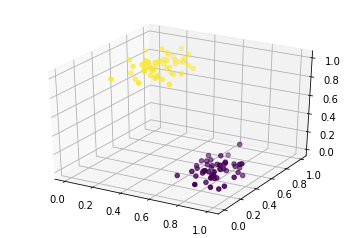

In [6]:
# plot the 3D graph for visualization
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1]);

# Autoencoder

An autoencoder is a type of deep neural network which learns to compress data from the input layer into a compressed representation, and then uncompress that code into something that closely matches the raw input data. An autoencoder consisting of an encoder layer and a decoder layers is a paradigm for deep learning architectures, an encoder, and decoder which are constructed by stacking multiple layers neural network.  

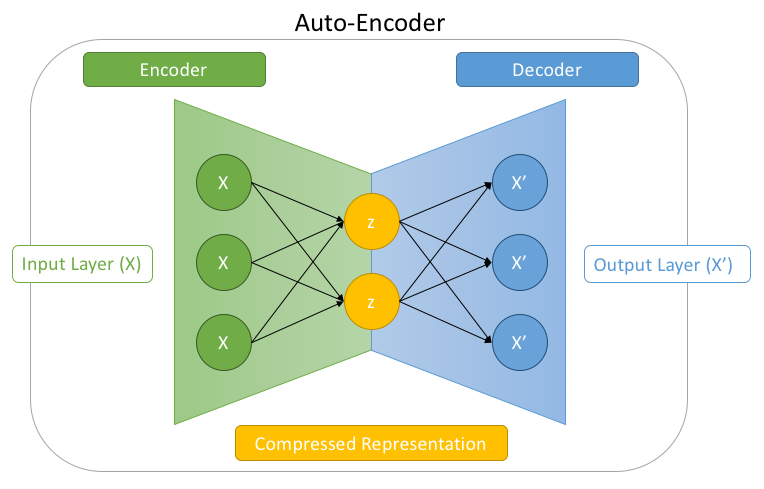

The encoder uses raw data as input and produces compressed feature as output, and the decoder uses the compressed feature from the encoder as input and tries to reconstructs the original raw input data as output.  In autoencoder, we want the network to learn the distribution of our input data, and since layer in encode shrink as they go deep, it forces the autoencoder to engage in dimensionality reduction. 

## Define Network 

To define network we are going to use `tensorflow` fully connected API. A linerar autoencoder has 3 layers (encoding, hidden and decoding), the encoding and decoding layers have ‘linear activations’ and the hidden layer has two neurons. Essentially this structure approximates PCA by reducing the data from four features to two features in the hidden layer.

In [7]:
# import tensorflow and layer API
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [8]:
num_input  = 3  # 3 dimensional input
num_hidden = 2  # 2 dimensional representation 
num_output = 3  # 3 dimensional output (same as input)

In [9]:
# placeholder for x
input_layer = tf.placeholder(tf.float32, shape=[None, num_input])

In [10]:
# fully connected hidden layer with no activation function
hidden_layer = fully_connected(input_layer, num_hidden, activation_fn=None)

In [11]:
# fully connected output layer with no activation function
output_layer = fully_connected(hidden_layer, num_output, activation_fn=None)

## Loss Function

Since, our target is to generate output sample as similar as input raw data, we are going to use `mean squared error`.

In [12]:
# defining loss function (Mean Squared Error)
loss = tf.reduce_mean(tf.square(output_layer - input_layer))

## Optimizer

In [13]:
# defining learning rate for the optimizer
learning_rate = 0.01

# create optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

## Running the Session

In [14]:
num_steps = 1000

# initialize session
with tf.Session() as sess:
    
    # initialize variables
    sess.run(tf.global_variables_initializer())
    
    # train the model
    for i in range(num_steps):
        sess.run(optimizer, feed_dict={input_layer: scaled_data})
   
    # eval hidden layer (2 dimensional output)
    output_ = hidden_layer.eval(feed_dict={input_layer: scaled_data})

## Result

After passing the `training data` through the `hidden layer` we get two `new vectors` and by plotting them against each other we clearly blob and cluster formation similar to Principal component analysis (PCA).

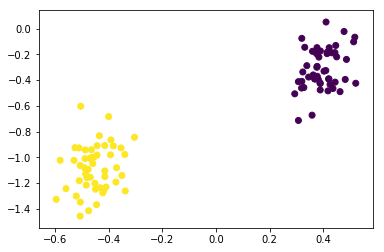

In [15]:
# plot the PCA result
plt.scatter(output_[:,0],output_[:,1],c=data[1]);